In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-prediction/seattle-weather.csv


In [2]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns

DATA EXPLORATION

In [3]:
data=pd.read_csv("/kaggle/input/weather-prediction/seattle-weather.csv")
data.shape

(1461, 6)

In [4]:
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


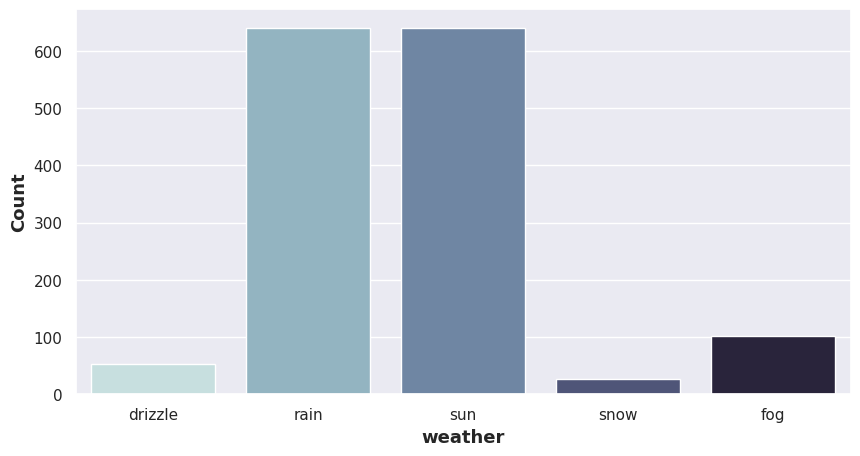

In [6]:
# Categorical variables
plt.figure(figsize=(10,5))
sns.set_theme()
sns.countplot(x = 'weather',data = data,palette="ch:start=.2,rot=-.3")
plt.xlabel("weather",fontweight='bold',size=13)
plt.ylabel("Count",fontweight='bold',size=13)
plt.savefig('Bar chart showing the distribution of categorical variables in the dataset')
plt.show()

In [7]:
countrain=len(data[data.weather=="rain"])
countsun=len(data[data.weather=="sun"])
countdrizzle=len(data[data.weather=="drizzle"])
countsnow=len(data[data.weather=="snow"])
countfog=len(data[data.weather=="fog"])
print("Percent of Rain:{:2f}%".format((countrain/(len(data.weather))*100)))
print("Percent of Sun:{:2f}%".format((countsun/(len(data.weather))*100)))
print("Percent of Drizzle:{:2f}%".format((countdrizzle/(len(data.weather))*100)))
print("Percent of Snow:{:2f}%".format((countsnow/(len(data.weather))*100)))
print("Percent of Fog:{:2f}%".format((countfog/(len(data.weather))*100)))

Percent of Rain:43.874059%
Percent of Sun:43.805613%
Percent of Drizzle:3.627652%
Percent of Snow:1.779603%
Percent of Fog:6.913073%


TEMPERATURE, WIND AND PRECIPITATION DATA

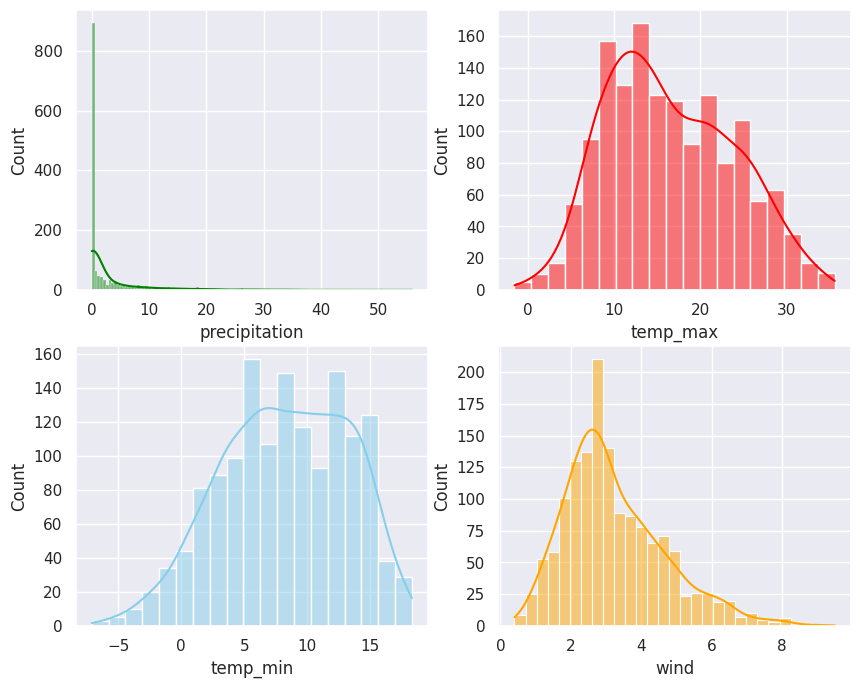

In [8]:
sns.set(style="darkgrid")
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=data,x="precipitation",kde=True,ax=axs[0,0],color='green')
sns.histplot(data=data,x="temp_max",kde=True,ax=axs[0,1],color='red')
sns.histplot(data=data,x="temp_min",kde=True,ax=axs[1,0],color='skyblue')
sns.histplot(data=data,x="wind",kde=True,ax=axs[1,1],color='orange')
plt.savefig('Histogram showing the distribution of numerical variables in the dataset')

TEMPERATURE, WIND AND PRECIPITATION DATA USING VILON PLOT

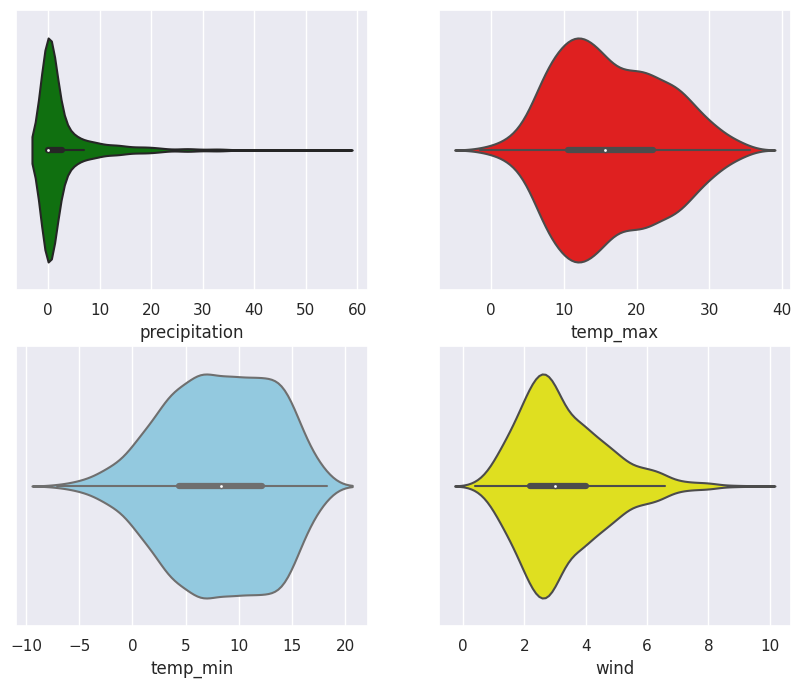

In [9]:
sns.set(style="darkgrid")
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.violinplot(data=data,x="precipitation",kde=True,ax=axs[0,0],color='green')
sns.violinplot(data=data,x="temp_max",kde=True,ax=axs[0,1],color='red')
sns.violinplot(data=data,x="temp_min",kde=True,ax=axs[1,0],color='skyblue')
sns.violinplot(data=data,x="wind",kde=True,ax=axs[1,1],color='yellow')
plt.savefig('Violin plot showing skewness in weather attribute distributions')